In [1]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MLT LABS/Lab1/bioresponse.csv')
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


#Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

Refer to ‘Random_Forrest.ipynb’ and ‘Decision_Trees.ipynb’ notebooks for examples. Split the data to train and test as 75%/25%.

In [4]:
random_state = 42

In [5]:
X = data.loc[:, data.columns !='Activity']
y = data.loc[:, data.columns =='Activity']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state)
print(X_train.shape)
print(X_test.shape)

(2813, 1776)
(938, 1776)


In [6]:
classifiers = (DecisionTreeClassifier(max_depth = 5, random_state = random_state),
               DecisionTreeClassifier(max_depth = 25, random_state = random_state),
               RandomForestClassifier(max_depth=5, random_state = random_state),
               RandomForestClassifier(max_depth=25, random_state = random_state))
classifiers_names = ['Small decision tree', 'Deep decision tree',
                      'Random forest on small trees', 'Random forest on deep trees']

#Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;


In [7]:
threshold = 0.5

In [8]:
results_preds = []
results_metrics=[]
for i in classifiers:
  model = i.fit(X_train,y_train)
  proba = model.predict_proba(X_test)[:,1]

  preds = np.where(proba > threshold, 1, 0)

  precision = metrics.precision_score(y_test, preds)
  recall = metrics.recall_score(y_test, preds)
  accuracy = metrics.accuracy_score(y_test, preds)
  f1 = metrics.f1_score(y_test, preds)
  log_loss = metrics.log_loss(y_test, proba)

  results_preds.append((preds, proba))
  results_metrics.append((precision, recall, accuracy, f1, log_loss))

<ipython-input-8-59aef77721f4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train,y_train)
<ipython-input-8-59aef77721f4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = i.fit(X_train,y_train)


 The following table shows that random forest on deep trees were able to generalize the data better.

In [9]:
results = pd.DataFrame(results_metrics,
                       index =classifiers_names,
                       columns =['Precision', 'Recall', 'Accuracy',
                                 'F1 score', 'Log loss'])
round(results,3)

,Precision,Recall,Accuracy,F1 score,Log loss
Small decision tree,0.778,0.807,0.759,0.793,0.745
Deep decision tree,0.753,0.712,0.703,0.732,10.548
Random forest on small trees,0.795,0.761,0.752,0.777,0.550
Random forest on deep trees,0.828,0.809,0.795,0.819,0.460


#Plot precision-recall and ROC curves for your models.


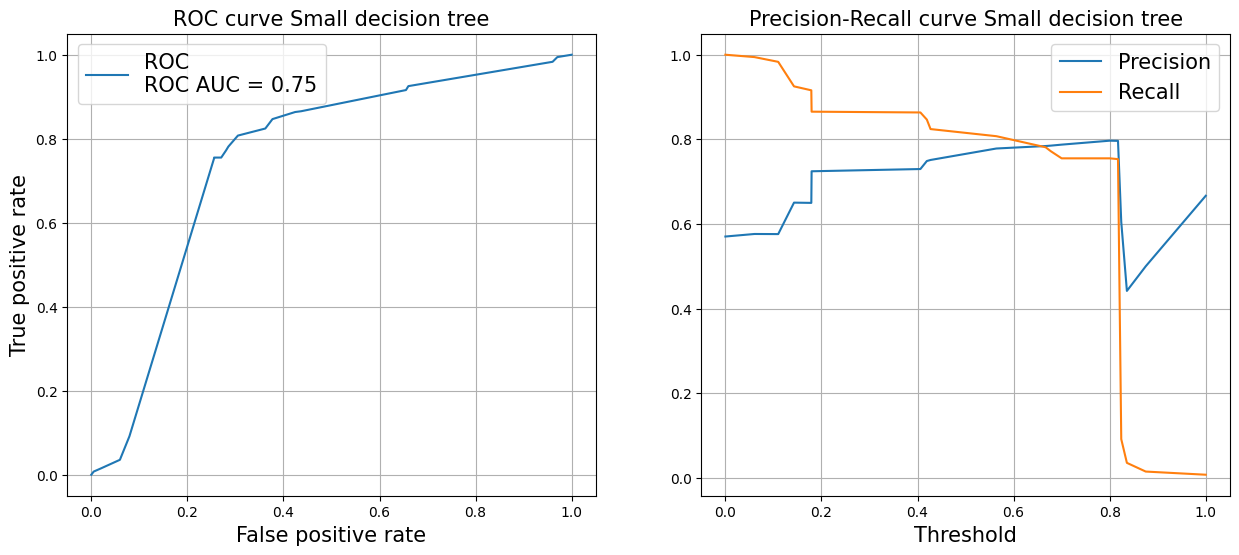

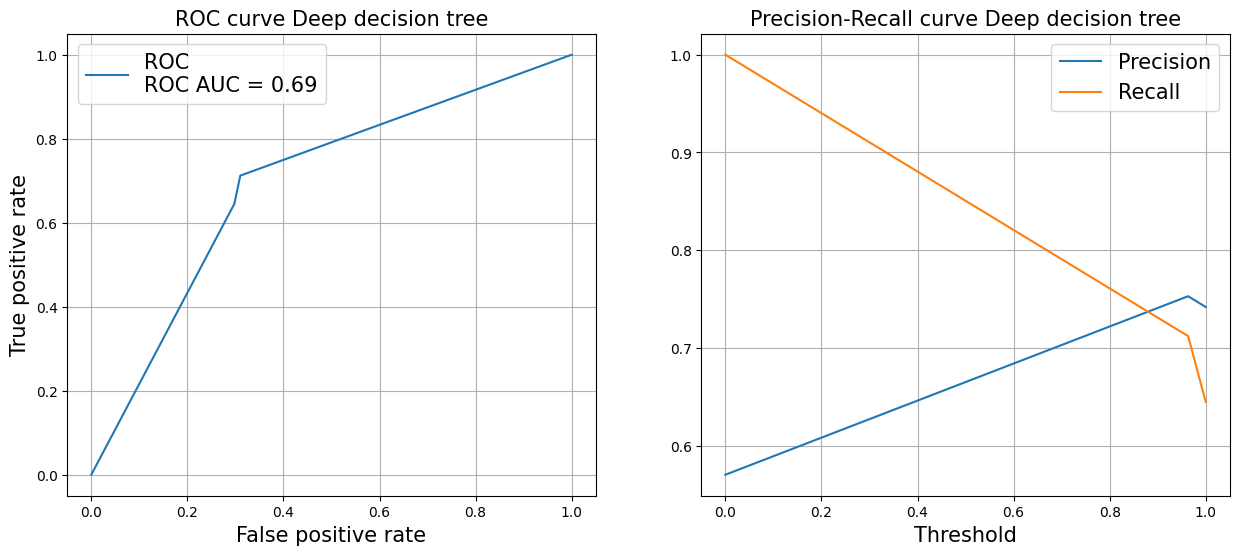

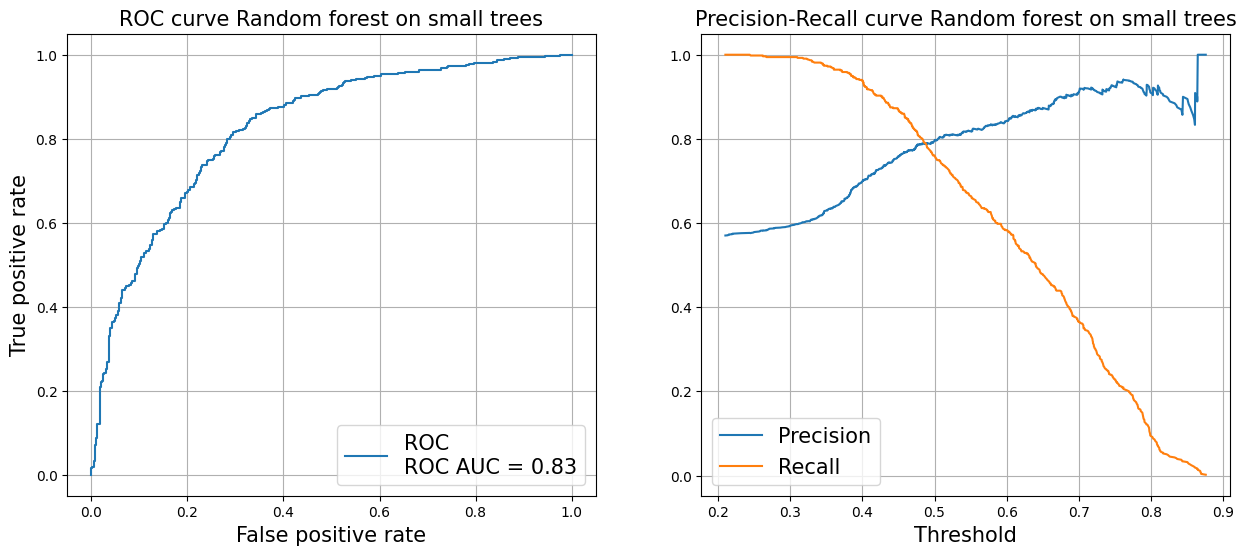

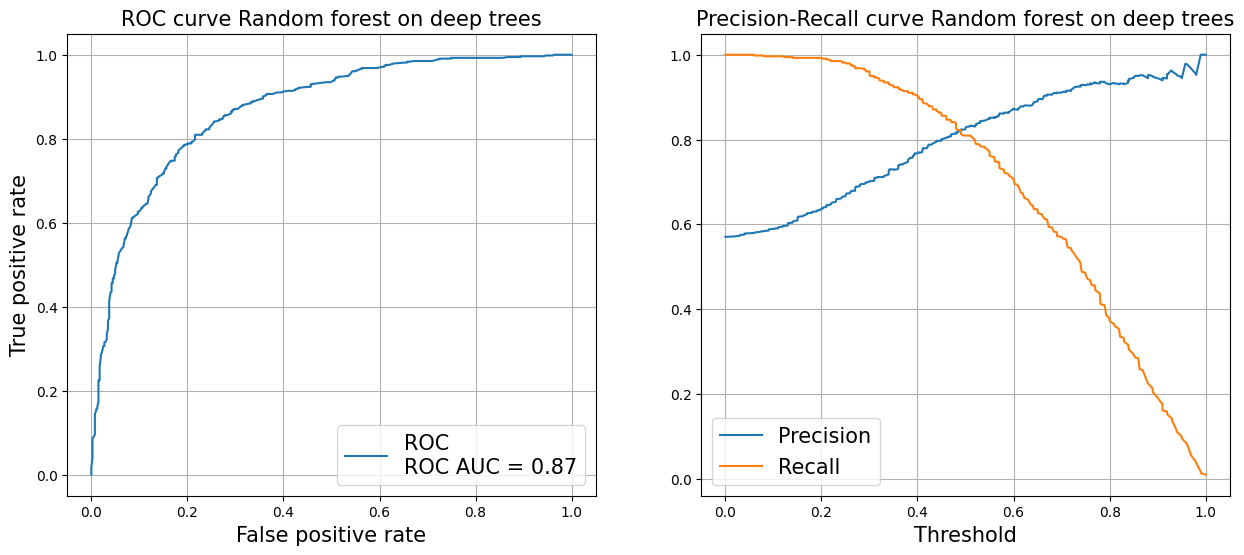

In [10]:
i_class = 0
for i in results_preds:
  roc_auc = metrics.roc_auc_score(y_test, i[1])
  # precision-recall curve
  prec, rec, thresh = metrics.precision_recall_curve(y_test, i[1])
  # roc
  fpr, tpr, thr = metrics.roc_curve(y_test, i[1])


  plt.figure(figsize=(15, 6))

  plt.subplot(121)
  plt.plot(fpr, tpr, label=f"ROC \nROC AUC = %.2f" % (roc_auc))
  plt.grid()
  plt.xlabel("False positive rate", fontsize = 15)
  plt.ylabel("True positive rate", fontsize = 15)
  plt.title(f"ROC curve {classifiers_names[i_class]}", fontsize = 15)
  plt.legend(fontsize = 15)

  plt.subplot(122)
  plt.grid()
  plt.plot(thresh, prec[:-1], label="Precision")
  plt.plot(thresh, rec[:-1], label="Recall")
  plt.xlabel(u"Threshold", fontsize = 15)
  plt.title(f'Precision-Recall curve {classifiers_names[i_class]}', fontsize = 15)


  plt.legend(fontsize = 15)
  plt.show()
  i_class+=1
  print("\n")

#Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95.

Firstly, I use GridSearch function to find suitable parameters for RandomForestClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid_for = {'n_estimators': list(range(50, 200, 50)), #количество деревьев в лесу
              'min_samples_leaf': list(range(1, 5, 1)),
              'max_depth': list(np.linspace(5, 25, 5, dtype=int)), # максимальная глубина одного дерева
              }

grid_search_forest = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_for,
    cv=5,
    n_jobs = -1,
    scoring='recall'
)

grid_search_forest.fit(X_train, y_train)

print(f'Best Hyperparameter Values: {grid_search_forest.best_params_}')
print(f'Best Models:{grid_search_forest.best_estimator_}')
print(f'Best score Cross validation: {grid_search_forest.best_score_:.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyperparameter Values: {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 100}
Best Models:RandomForestClassifier(max_depth=15, min_samples_leaf=2, random_state=42)
Best score Cross validation: 0.816


Having received the results, I build a graph to determine the approximate threshold value

<ipython-input-14-0a3da5153e28>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  proba_new = RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, n_estimators = 100 , random_state = random_state).fit(X_train,y_train).predict_proba(X_test)[:,1]


Text(0.5, 1.0, 'Recall curve for Random Forest on deep trees')

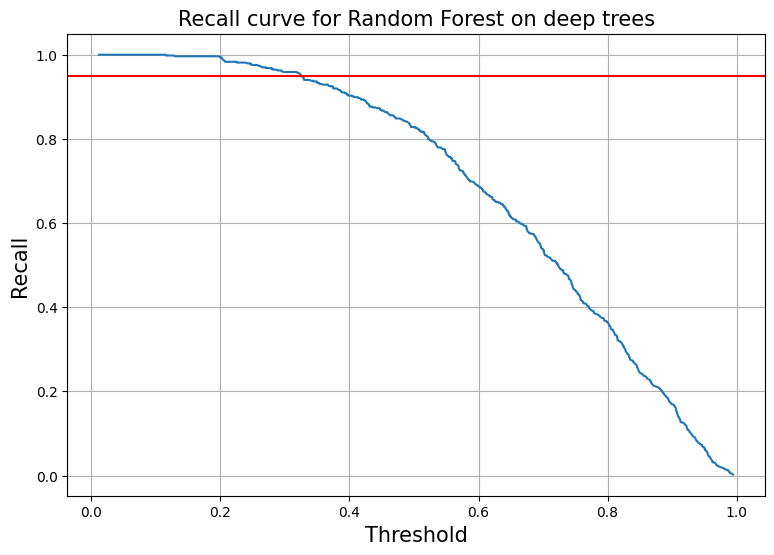

In [14]:
proba_new = RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, n_estimators = 100 , random_state = random_state).fit(X_train,y_train).predict_proba(X_test)[:,1]
prec, rec, thresh = metrics.precision_recall_curve(y_test, proba_new)

plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, rec[:-1])
plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.xlabel(u"Threshold",fontsize = 15)
plt.ylabel(u"Recall",fontsize = 15)
plt.title(u'Recall curve for Random Forest on deep trees',fontsize = 15)

Needed threshold value is approximately 0.32
Checking metrics values


In [19]:
threshold = 0.32
preds_modified = np.where(proba_new > threshold, 1, 0)

precision = metrics.precision_score(y_test, preds_modified)
recall = metrics.recall_score(y_test, preds_modified)
accuracy = metrics.accuracy_score(y_test, preds_modified)
f1 = metrics.f1_score(y_test, preds_modified)
log_loss = metrics.log_loss(y_test, preds_modified)

print('Parameters for classification with threshold =', threshold)
print(f'Precision: ', precision)
print(f'Recall: ', recall)
print(f'Accuracy: ', accuracy)
print(f'F1_score: ', f1)
print(f'Logloss: ', log_loss)

Parameters for classification with threshold = 0.32
Precision:  0.7042640990371389
Recall:  0.9570093457943926
Accuracy:  0.746268656716418
F1_score:  0.8114104595879557
Logloss:  9.14540459126853


**Conclusion:**
The final results show that the conditions for recall value are met. Metrics such as accuracy, presicion and f1 score also have good values. It should be mentioned that log loss value of 9.14 is high, indicating a need for model improvement. High value can be related to that the model's predicted probabilities do not align well with the true class labels. Also it can be related to specific threshold value (0.32)